In [1]:
from loader import get_mnist_data

In [2]:
digits, labels = get_mnist_data()

In [3]:
training_digits, test_digits = digits[60000:], digits[:-10000]
training_labels, test_labels = labels[60000:], labels[:-10000]

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

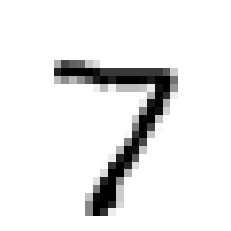

'7'

In [5]:
plt.imshow(training_digits[0].reshape(28, 28), cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

training_labels[0]

In [6]:
train_label_is_five = (training_labels == '5')
test_label_is_five = (test_labels == '5')
train_label_is_five

array([False, False, False, ..., False,  True, False])

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_cliff = SGDClassifier(random_state=42, early_stopping=True)
sgd_cliff.fit(training_digits, train_label_is_five)

SGDClassifier(early_stopping=True, random_state=42)

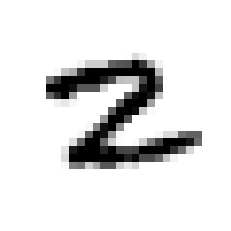

'2'

In [22]:
index = 143
plt.imshow(test_digits[index].reshape(28, 28), cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

test_labels[index]

In [24]:

sgd_cliff.predict([test_digits[index]])

array([False])

In [29]:
def test_model(classifier: SGDClassifier, test_samples, test_labels):

    correct = 0
    total = 0
    confusion_matrix = np.zeros(10, dtype=int)
    for sample, label in zip(test_samples, test_labels):
        classifier_result = classifier.predict([sample])
        if classifier_result == (label == '5'):
            correct += 1
        else:
            confusion_matrix[int(label)] += 1
        total += 1
    
    print(f"Total number of test samples is {total}")
    print(f"Correct number of test samples is {correct}")
    print(f"Accuracy of model is {correct/total}")
    for i, temp in enumerate(confusion_matrix):
        print(f"{i} was confused {temp} times")
    

In [30]:
test_model(sgd_cliff, test_digits, test_labels)

Total number of test samples is 60000
Correct number of test samples is 57719
Accuracy of model is 0.9619833333333333
0 was confused 25 times
1 was confused 26 times
2 was confused 13 times
3 was confused 105 times
4 was confused 9 times
5 was confused 1901 times
6 was confused 40 times
7 was confused 36 times
8 was confused 68 times
9 was confused 58 times


In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_cliff, training_digits, train_label_is_five, cv=3, scoring="accuracy")

array([0.93461308, 0.93489349, 0.96939694])